# **1. Perkenalan Dataset**


### Data Understanding

Dataset [Crop Recommendation Dataset](https://www.kaggle.com/datasets/atharvaingle/crop-recommendation-dataset/data) dari Kaggle berisi data parameter pertanian seperti nutrisi tanah, kondisi lingkungan, dan jenis tanaman yang cocok berdasarkan parameter tersebut. Dataset ini dapat digunakan untuk membangun model rekomendasi tanaman berdasarkan kondisi lahan.

#### Informasi Dataset

- **Jumlah Data**: 2200 baris dan 8 kolom
- **Sumber Dataset**: Bersumber dari Kaggle dengan nama [Crop Recommendation Dataset](https://www.kaggle.com/datasets/atharvaingle/crop-recommendation-dataset/data)
- **Kondisi Data**:

  - Missing Value: Tidak terdapat nilai yang hilang (0)
  - Data Duplikat: Tidak terdapat nilai yang duplikat (0)
  - Outlier: Terdapat data yang outlier yaitu pada kolom numerikal (P, K, temperature, humidity, ph)
  - Jumlah sampel: Masing-masing jenis tanaman terdapat 100 sampel data

#### Variabel-variabel pada Crop Recommendation Dataset adalah sebagai berikut:

- **N** (Nitrogen): Kandungan nitrogen dalam tanah (satuan: ppm).
- **P** (Phosphorus): Kandungan fosfor dalam tanah (satuan: ppm).
- **K** (Potassium): Kandungan kalium dalam tanah (satuan: ppm).
- **temperature** : Suhu rata-rata dalam °C.
- **humidity** : Kelembapan relatif dalam %.
- **ph** : Tingkat keasaman tanah (skala pH).
- **rainfall** : Curah hujan dalam mm.
- **label** : Jenis tanaman yang direkomendasikan (target variabel).


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
# load data
df_soil = pd.read_csv('Crop_recommendation.csv')
df_soil

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [3]:
# Deskripsi Variabel
print("\nInformasi Dataset:")
df_soil.info()


Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [4]:
# Deskripsi statistik
print("\nStatistik Deskriptif:")
df_soil.describe(include='all').T


Statistik Deskriptif:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
N,2200.0,NaN,NaN,NaN,50.551818,36.917334,0.0,21.0,37.0,84.25,140.0
P,2200.0,NaN,NaN,NaN,53.362727,32.985883,5.0,28.0,51.0,68.0,145.0
K,2200.0,NaN,NaN,NaN,48.149091,50.647931,5.0,20.0,32.0,49.0,205.0
temperature,2200.0,NaN,NaN,NaN,25.616244,5.063749,8.825675,22.769375,25.598693,28.561654,43.675493
humidity,2200.0,NaN,NaN,NaN,71.481779,22.263812,14.25804,60.261953,80.473146,89.948771,99.981876
ph,2200.0,NaN,NaN,NaN,6.46948,0.773938,3.504752,5.971693,6.425045,6.923643,9.935091
rainfall,2200.0,NaN,NaN,NaN,103.463655,54.958389,20.211267,64.551686,94.867624,124.267508,298.560117
label,2200,22,rice,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Menangani Missing value
print("\nJumlah Missing Value:")
print(df_soil.isnull().sum())


Jumlah Missing Value:
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


In [6]:
# Mendeteksi data duplikat
print("\nJumlah Data Duplikat:")
print(df_soil.duplicated().sum())


Jumlah Data Duplikat:
0


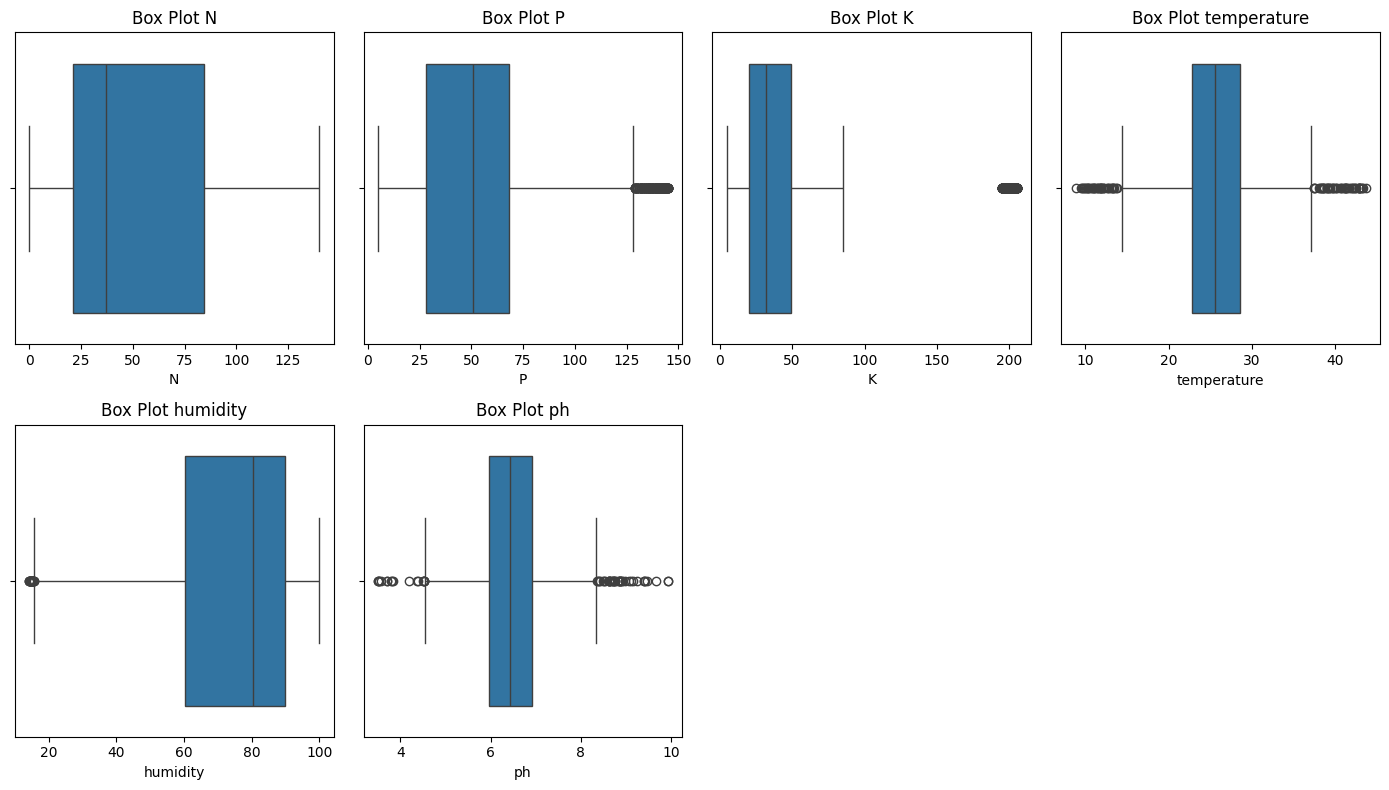

In [7]:
# Mendeteksi data yang outliers serta menampilkan dengan boxplot

numerical_features = df_soil.select_dtypes(include=np.number).columns[:-1]
plt.figure(figsize=(14, 8))
for i, col in enumerate(numerical_features):
    plt.subplot(2, 4, i + 1)
    sns.boxplot(x=df_soil[col])
    plt.title(f'Box Plot {col}')
plt.tight_layout()
plt.show()


Univariate Analysis (Distribusi Fitur):


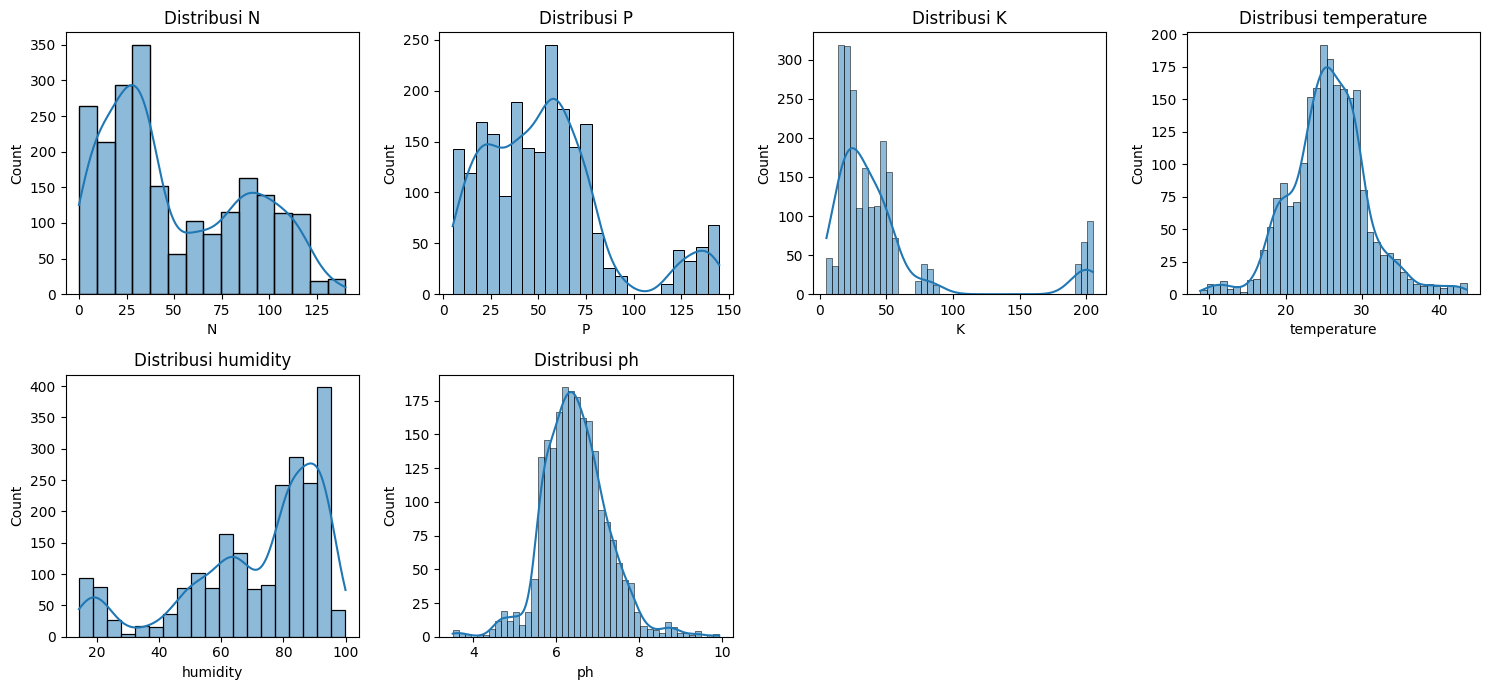

In [8]:
# Univariate Analysis
print("\nUnivariate Analysis (Distribusi Fitur):")
plt.figure(figsize=(15, 7))
for i, col in enumerate(numerical_features):
    plt.subplot(2, 4, i + 1)
    sns.histplot(df_soil[col], kde=True)
    plt.title(f'Distribusi {col}')
plt.tight_layout()
plt.show()


Univariate Analysis (Distribusi Target):
label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64


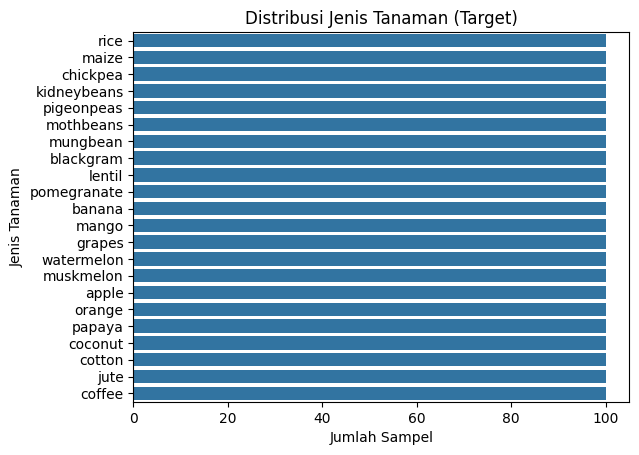

In [9]:
print("\nUnivariate Analysis (Distribusi Target):")
print(df_soil['label'].value_counts())
sns.countplot(y=df_soil['label'])
plt.title('Distribusi Jenis Tanaman (Target)')
plt.xlabel('Jumlah Sampel')
plt.ylabel('Jenis Tanaman')
plt.show()


Multivariate Analysis (Korelasi):


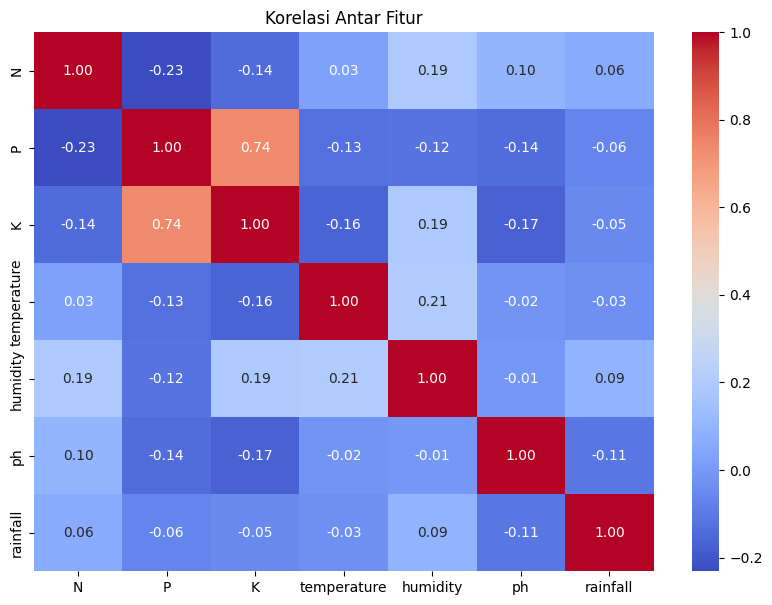

In [10]:
# Multivariate Analysis
print("\nMultivariate Analysis (Korelasi):")
numerical_features = df_soil.select_dtypes(include=np.number).columns
correlation_matrix = df_soil[numerical_features].corr()
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi Antar Fitur')
plt.show()

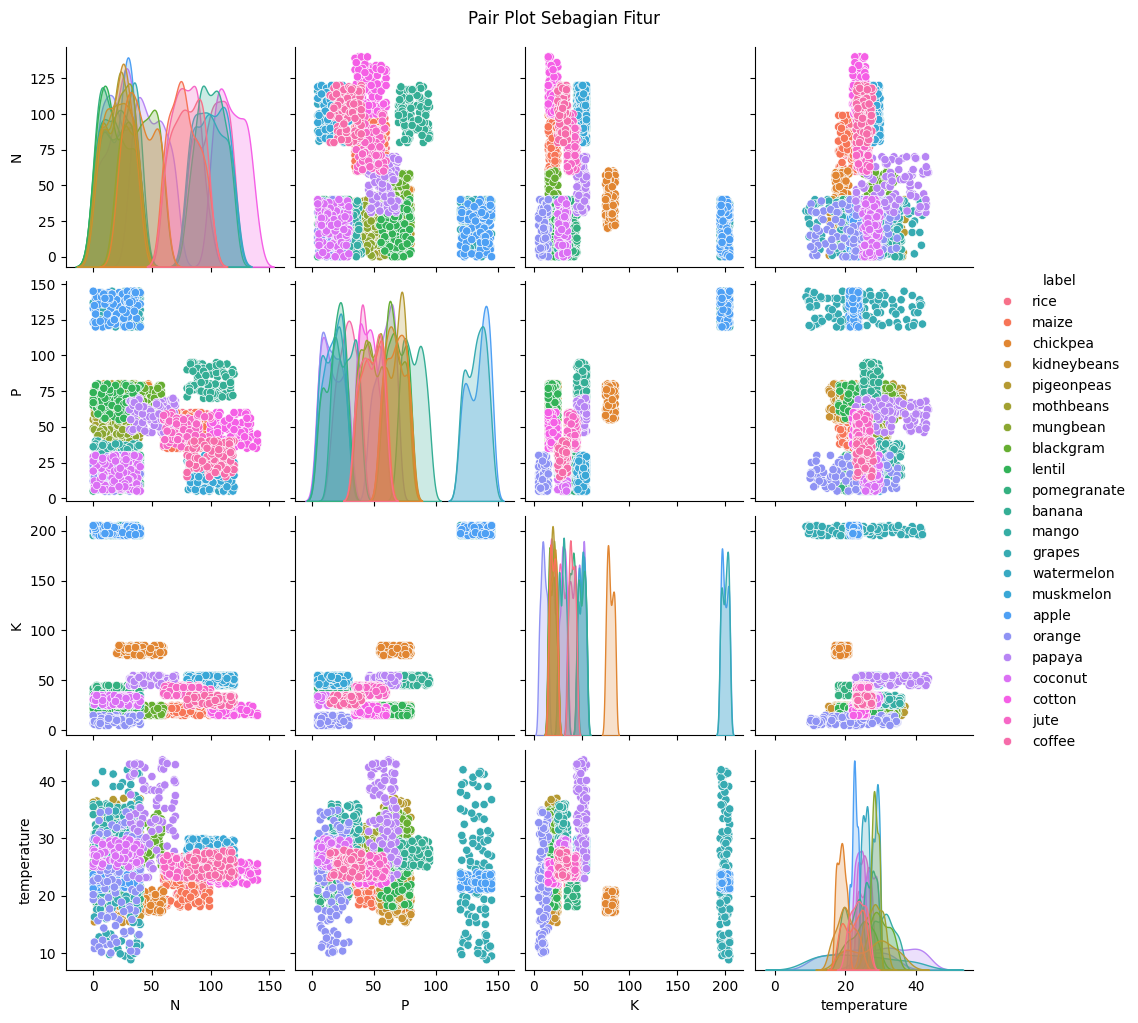

In [11]:
# Multivariate Analysis (Pair Plot - Contoh sebagian fitur)
sns.pairplot(df_soil[['N', 'P', 'K', 'temperature', 'label']], hue='label', diag_kind='kde')
plt.suptitle('Pair Plot Sebagian Fitur', y=1.02)
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [12]:
# Mengecek nilai yang hilang
print("\nJumlah Nilai yang Hilang per Kolom:")
print(df_soil.isnull().sum())


Jumlah Nilai yang Hilang per Kolom:
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


In [13]:
# Mengecek data duplikat
print("\nJumlah Data Duplikat:")
print(df_soil.duplicated().sum())


Jumlah Data Duplikat:
0


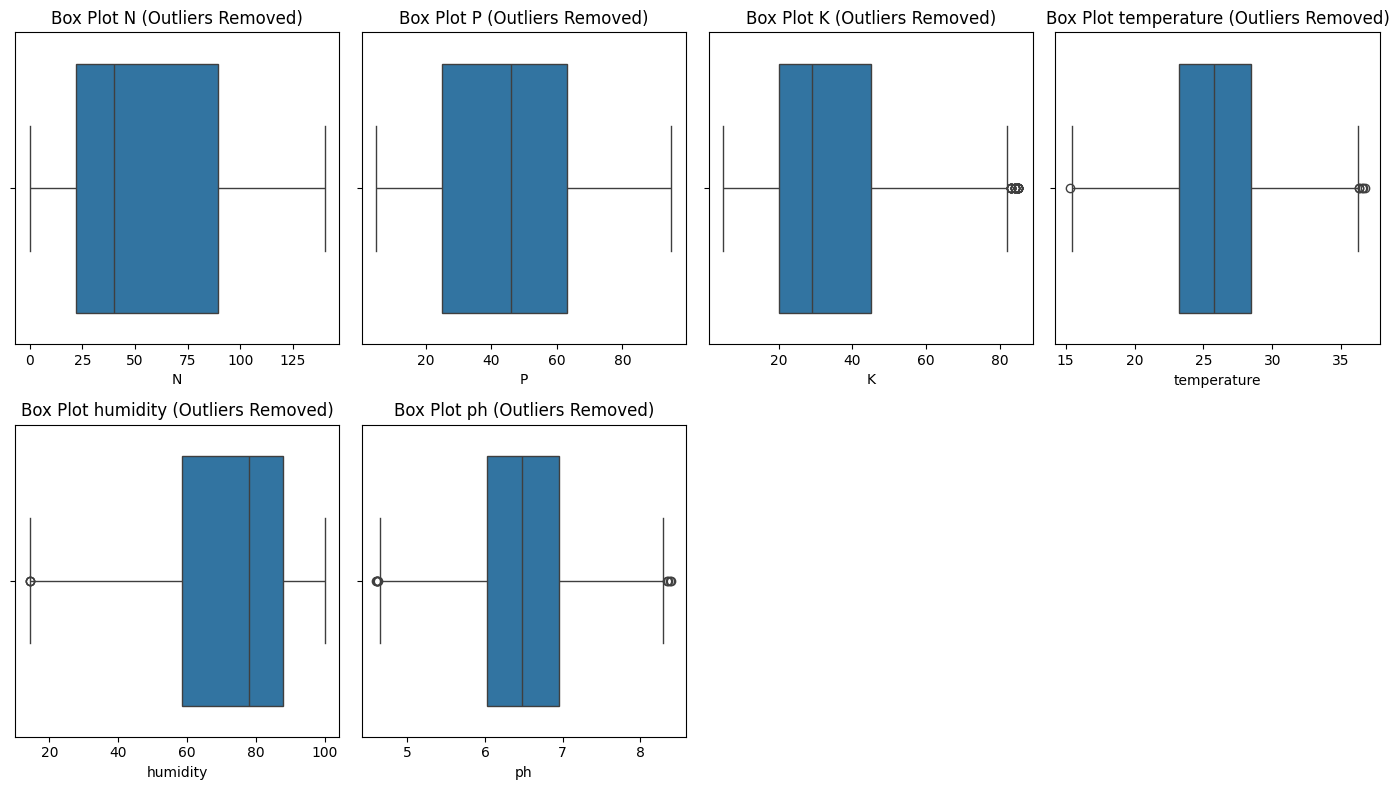

In [14]:
# Menangani data outliers menggunakan metode IQR, serta menampilkan dengan boxplot

def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

numerical_features = df_soil.select_dtypes(include=np.number).columns[:-1]
df_no_outliers = df_soil.copy()

for col in numerical_features:
    df_no_outliers = remove_outliers_iqr(df_no_outliers, col)

plt.figure(figsize=(14, 8))
for i, col in enumerate(numerical_features):
    plt.subplot(2, 4, i + 1)
    sns.boxplot(x=df_no_outliers[col])
    plt.title(f'Box Plot {col} (Outliers Removed)')
plt.tight_layout()
plt.show()

In [15]:
df_soil.shape

(2200, 8)

In [16]:
# Encoding Label Target
label_encoder = LabelEncoder()
df_soil['label_encoded'] = label_encoder.fit_transform(df_soil['label'])
X = df_soil.drop(['label', 'label_encoded'], axis=1)
y = df_soil['label_encoded']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Data Splitting
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print("\nUkuran Data Latih:", X_train.shape, y_train.shape)
print("Ukuran Data Validasi:", X_val.shape, y_val.shape)
print("Ukuran Data Uji:", X_test.shape, y_test.shape)


Ukuran Data Latih: (1540, 7) (1540,)
Ukuran Data Validasi: (330, 7) (330,)
Ukuran Data Uji: (330, 7) (330,)


In [17]:
# Simpan Hasil Prerocessing
df_soil.to_csv('df_soil_preprocessed.csv', index=False)